In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
import patsy
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set_style('darkgrid')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
dta =sm.datasets.fair.load_pandas().data

patsy.

In [34]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [35]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [36]:
dta['affair'] = (dta.affairs > 0).astype(int)

In [37]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

In [38]:
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2',
                    'C(occupation)[T.3.0]':'occ_3',
                    'C(occupation)[T.4.0]':'occ_4',
                    'C(occupation)[T.5.0]':'occ_5',
                    'C(occupation)[T.6.0]':'occ_6',
                    'C(occupation_husb)[T.2.0]':'occ_husb_2',
                    'C(occupation_husb)[T.3.0]':'occ_husb_3',
                    'C(occupation_husb)[T.4.0]':'occ_husb_4',
                    'C(occupation_husb)[T.5.0]':'occ_husb_5',
                    'C(occupation_husb)[T.6.0]':'occ_husb_6'}
            )

In [39]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [40]:
y['affair'].astype(int).value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [41]:
print(f"0 : [{np.round(((y['affair'].value_counts()[0] / 6365 ) * 100), 2)} %]")
print(f"1 : [{np.round(((y['affair'].value_counts()[1] / 6365 ) * 100), 2)} %]")

0 : [67.76 %]
1 : [32.25 %]


Metric : 
        - Log loss
        - Confusion matrix

In [216]:
# y = np.ravel(y)
# y.shape

(6366,)

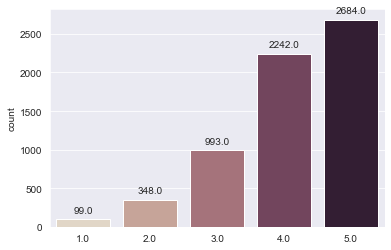

In [42]:
marriage_rating_count = X['rate_marriage'].value_counts().sort_values(ascending=False).to_frame()
marriage_rating_count = marriage_rating_count.rename(columns={'rate_marriage': 'count'})
ax = sns.barplot(x=marriage_rating_count.index, y='count', data=marriage_rating_count,palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height()),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

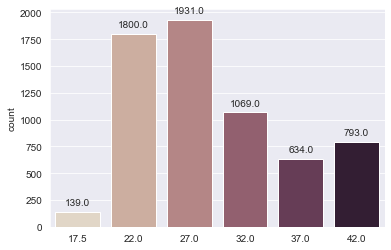

In [43]:
age_count = X['age'].value_counts().sort_values(ascending=False).to_frame()
age_count = age_count.rename(columns={'age':'count'})
ax = sns.barplot(x=age_count.index, y='count', data=age_count, palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height()),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

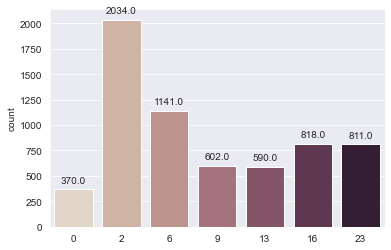

In [19]:
yrs_mar_count = X['yrs_married'].value_counts().sort_values(ascending=False).to_frame()
yrs_mar_count = yrs_mar_count.rename(columns={'yrs_married':'count'})
ax = sns.barplot(x=yrs_mar_count.index, y='count', data=yrs_mar_count, palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height()),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

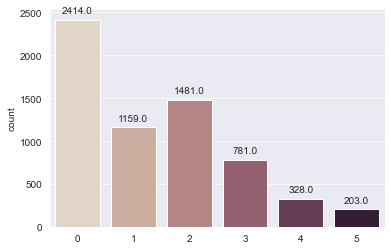

In [20]:
child_count = X['children'].value_counts().sort_values(ascending=False).to_frame()
child_count = child_count.rename(columns={'children':'count'})
ax = sns.barplot(x=child_count.index, y='count', data=child_count, palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height()),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

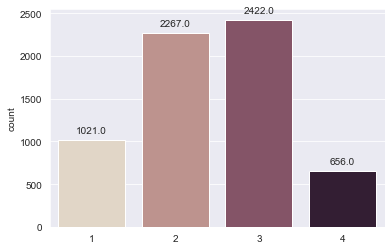

In [21]:
religious_count = X['religious'].value_counts().sort_values(ascending=False).to_frame()
religious_count = religious_count.rename(columns={'religious':'count'})
ax = sns.barplot(x=religious_count.index, y='count', data=religious_count, palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height()),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

In [44]:
edu = {9:0, 12:1, 14:2, 16:3, 17:4, 20:5}
X['educ'] = X['educ'].astype(int).map(edu)

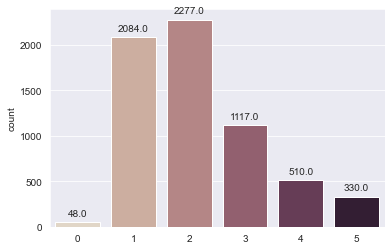

In [49]:
educ_count = X['educ'].value_counts().sort_values(ascending=False).to_frame()
educ_count = educ_count.rename(columns={'educ':'count'})
ax = sns.barplot(x=educ_count.index, y='count', data=educ_count, palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height()),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

In [46]:
# X['rate_marriage'] = X['rate_marriage'].astype(int)
# X['age'] =X['age'].astype(int)
# X['yrs_married'] = X['yrs_married'].astype(int)
# X['children'] = X['children'].astype(int)
# X['religious'] = X['religious'].astype(int)
# X['educ'] = X['educ'].astype(int)
# y['affair'] = y['affair'].astype(int)
X.drop(columns=['Intercept'], axis=1, inplace=True)

In [47]:
X = X.astype(int)

In [48]:
y['affair'] = y['affair'].astype(int)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"{X_test.shape}")
print(f"{X_train.shape}")

(1274, 16)
(5092, 16)


In [51]:
from sklearn.preprocessing import StandardScaler

sdr = StandardScaler()
X_train = sdr.fit_transform(X_train)
X_test = sdr.transform(X_test)
print(X_test.shape)
X_train.shape

(1274, 16)


(5092, 16)

In [52]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

In [53]:
cv_log_error = []
alpha = [10**x for x in range(-4, 3)]
for i in alpha:
    clf = SGDClassifier(alpha=i, loss='log', penalty='l2', random_state=1)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train, y_train)
    y_pred = sig_clf.predict_proba(X_test)
    loss = log_loss(y_test, y_pred, labels=clf.classes_, eps=1e-15)
    print(f"[{i}] [{loss}]")
    cv_log_error.append(loss)
    
best_alpha = alpha[np.argmin(cv_log_error)]
print(best_alpha)

[0.0001] [0.5444658697049668]
[0.001] [0.5332563838428003]
[0.01] [0.5321397616461715]
[0.1] [0.5346289344507981]
[1] [0.5438786368488671]
[10] [0.5505425154862079]
[100] [0.5516096365416536]
0.01


In [54]:
clf = SGDClassifier(alpha=0.01, loss='log', penalty='l2', random_state=1)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
sig_clf.fit(X_train, y_train)
y_pred = sig_clf.predict_proba(X_test)
loss = log_loss(y_test, y_pred, labels=clf.classes_, eps=1e-15)
print(np.round(loss, 2))

0.53


In [55]:
y_pred = sig_clf.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[787,  85],
       [248, 154]], dtype=int64)

In [56]:
metrics.accuracy_score(y_test, y_pred)

0.7386185243328101

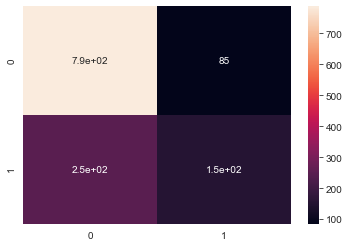

In [57]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [58]:
import pickle
file_name = '../models/logistic_model.pkl'
pickle.dump(sig_clf, open(file_name, 'wb'))

In [59]:
sdr_file_name = '../models/std_norm.sav'
pickle.dump(sdr, open(sdr_file_name, 'wb'))

In [60]:
model = pickle.load(open(file_name, 'rb'))
sdr = pickle.load(open(sdr_file_name, 'rb'))

In [61]:
query = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3, 32, 9, 3, 3, 4]
query = sdr.transform([query])
model.predict_proba(query)

array([[0.65760583, 0.34239417]])

In [62]:
model.predict(query)

array([0])

In [243]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [244]:
query2 = [[0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,27,13,3,1,2]]
query = sdr.transform(query2)
model.predict_proba(query)

array([[0.79260904, 0.20739096]])

In [245]:
model.predict(query)

array([0.])

In [247]:
y[1]

1.0

In [249]:
query3 = [[1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,22,2,0,2,3]]
query = sdr.transform(query3)
model.predict(query)

array([0.])